In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
# to display all of the columns
pd.set_option('display.max_columns', 500)

In [2]:
players_df = pd.read_csv('/kaggle/input/esports-earnings-for-players-teams-by-game/highest_earning_players.csv')
teams_df = pd.read_csv('/kaggle/input/esports-earnings-for-players-teams-by-game/highest_earning_teams.csv')

# Exploring Teams DataSet

In [3]:
teams_df.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


In [4]:
# checking for null values
teams_df.isna().sum()

TeamId              0
TeamName            0
TotalUSDPrize       0
TotalTournaments    0
Game                0
Genre               0
dtype: int64

In [5]:
teams_df.shape

(928, 6)

In [6]:
# show all the games in the dataset
teams_df['Game'].unique()

array(['Overwatch', 'Starcraft II', 'League of Legends', 'Fortnite',
       'Counter-Strike: Global Offensive', 'Dota 2', 'PUBG',
       'Heroes of the Storm', 'Hearthstone', 'Arena of Valor'],
      dtype=object)

In [7]:
teams_df.dtypes

TeamId                int64
TeamName             object
TotalUSDPrize       float64
TotalTournaments      int64
Game                 object
Genre                object
dtype: object

# We'll find the top 5 teams' earnings.

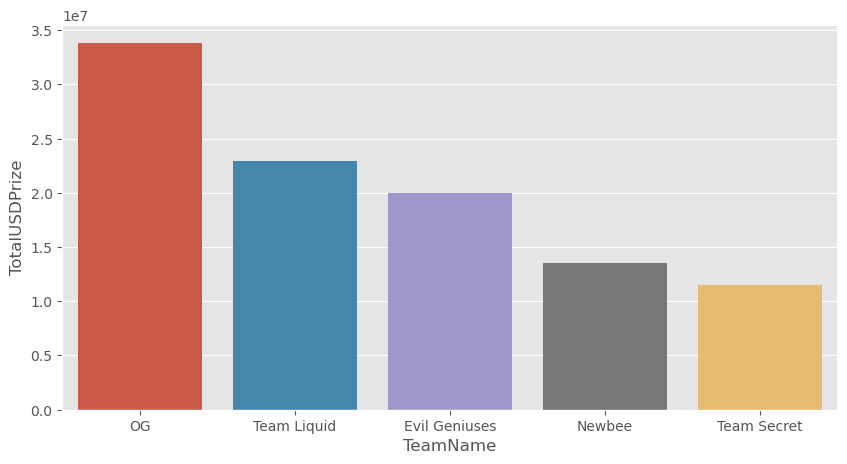

In [8]:
fig,ax = plt.subplots(figsize=(10, 5))
data = teams_df.nlargest(5,'TotalUSDPrize')
sns.barplot(x="TeamName", y="TotalUSDPrize",ax=ax, data=data )
plt.show()

# Let's Find the average prize money of each game to know the highest paying 5 games
- we're using the filter method to select only the groups where the mean prize amount is greater than 2.076906e+05. Note that we're using a lambda function to apply the filter, which takes a dataframe x as input and returns True if the mean of the TotalUSDPrize column is greater than 2.076906e+05, and False otherwise.

- After filtering the DataFrame, we're grouping it again by the Game column and calculating the mean of the TotalUSDPrize column for each group. Finally, we're using the reset_index method to reset the index of the resulting DataFrame.

In [9]:
games_prize = teams_df.groupby('Game') \
        .filter(lambda x: x['TotalUSDPrize'].mean() > 2.076906e+05) \
        .groupby('Game')['TotalUSDPrize'].mean().reset_index()
games_prize

,Game,TotalUSDPrize
0,Counter-Strike: Global Offensive,8.485393e+05
1,Dota 2,2.202828e+06
2,Fortnite,3.466133e+05
3,League of Legends,6.466556e+05
4,Starcraft II,2.785615e+05


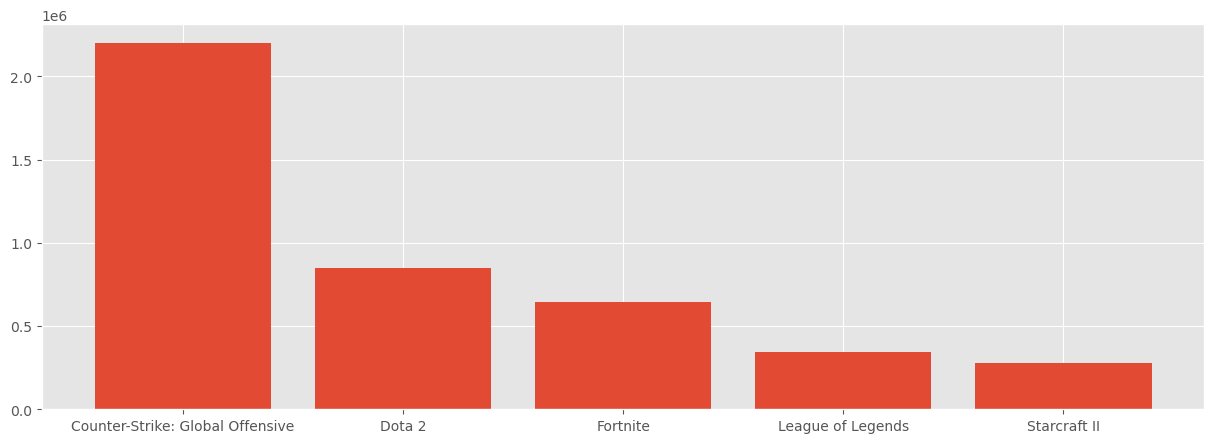

In [10]:
fig,ax = plt.subplots(figsize=(15, 5))
labels = games_prize['Game']
prizes = games_prize['TotalUSDPrize'].sort_values(ascending=False)
plt.bar( labels, height = prizes)
plt.show()

# Exploring Players Dataset

In [11]:
players_df.head(10)

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
5,16800,Jakey,Yip,Stewie2k,us,1087340.00,Counter-Strike: Global Offensive,First-Person Shooter
6,12183,Epitácio,de Melo,TACO,br,1063858.27,Counter-Strike: Global Offensive,First-Person Shooter
7,12169,Fernando,Alvarenga,fer,br,1063038.92,Counter-Strike: Global Offensive,First-Person Shooter
8,2455,Gabriel,Toledo,FalleN,br,1059938.92,Counter-Strike: Global Offensive,First-Person Shooter
9,12182,Marcelo,David,coldzera,br,1021901.46,Counter-Strike: Global Offensive,First-Person Shooter


In [12]:
# checking for  null values
players_df.isna().sum()

PlayerId         0
NameFirst        0
NameLast         0
CurrentHandle    0
CountryCode      0
TotalUSDPrize    0
Game             0
Genre            0
dtype: int64

In [13]:
players_df.dtypes

PlayerId           int64
NameFirst         object
NameLast          object
CurrentHandle     object
CountryCode       object
TotalUSDPrize    float64
Game              object
Genre             object
dtype: object

In [14]:
players_df.shape

(1000, 8)

# Finding the Top Participating  Countries 

In [15]:
pr_countries = players_df.groupby(['CountryCode']) \
              .size().reset_index().rename(columns={0:'Count'})\
              .sort_values('Count', ascending=False).head(5)
pr_countries

,CountryCode,Count
29,kr,251
10,cn,168
53,us,114
45,se,45
18,fr,37


# Observations:
- Most Participating Players are from korea

# Plotting The Top 5 Countries

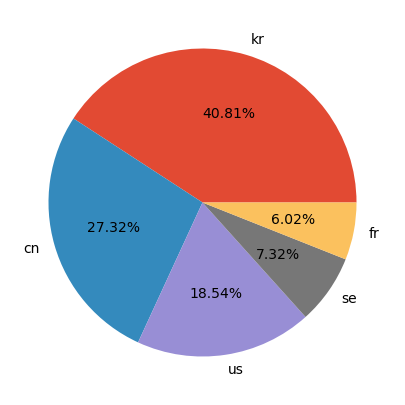

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
labels = pr_countries['CountryCode']
count = pr_countries['Count']
plt.pie(count, labels = labels, autopct='%1.2f%%')
plt.show()

# We are curious about the top 5 earning countries:
1. First we wil  find the top 5 countries TotalUSDPrize 
2. Then plotting them with Sunburst Chart from PLotly Library

In [17]:
total_prize_by_country = players_df.groupby('CountryCode')['TotalUSDPrize'].sum().sort_values(ascending=False).head(5)

total_prize_by_country

CountryCode
cn    72391878.56
kr    58441733.71
us    43099381.78
dk    26840800.02
se    20770423.01
Name: TotalUSDPrize, dtype: float64

In [18]:
#This new DataFrame has information about the top countries earnings'
top_countries = players_df.loc[players_df['CountryCode'].isin(['cn', 'kr', 'us','dk','se'])]
top_countries

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
992,29438,Anthony,Trevino,Ant,us,52375.00,Hearthstone,Collectible Card Game
993,38798,-,-,Trunks,cn,51231.70,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [19]:
countries_prize = top_countries.groupby(['CountryCode','Game'])['TotalUSDPrize'].sum() \
             .reset_index().sort_values('TotalUSDPrize', ascending=False)

fig = px.sunburst(countries_prize, path=['CountryCode','Game'], values='TotalUSDPrize',width=800, height=800)
fig.show()

# Finding the top 5 players' earnings
1. first we will merge first and last name to get the full name
2. Sorting the highest earnings
2. plotting 

In [20]:
# Making New Column With Full Name
players_df['Full Name'] = players_df['NameFirst'] + ' '+  players_df['NameLast']
# having the top 5 earnings
pl_earnings = players_df.groupby(['Full Name'])['TotalUSDPrize'].sum().sort_values(ascending=False).head(5)
pl_earnings

Full Name
Johan Sundstein        6952596.58
Jesse Vainikka         6470000.02
Anathan Pham           6000411.96
Sébastien Debs         5554297.41
Topias Taavitsainen    5470902.57
Name: TotalUSDPrize, dtype: float64

In [21]:
fig = px.bar(pl_earnings,y='TotalUSDPrize',color='TotalUSDPrize')
fig.show()

# thanks to Jack Daoud for this DataSet (https://www.kaggle.com/jackdaoud)